In [15]:
# Note can find best metric and best model checkpoint at top of trainer_state.json file

# Best learning rate seems to be around 10^-4

# To improve speed could I try repeating results with only ~ 100 samples (50 of each class)

In [123]:
from pathlib import Path
import json


directory = Path("/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to the codes/Batch3")

log_hist = {}

for d in directory.iterdir():
    # if "wd:0.01" not in d.name: # TEMP FIX
    #     continue
      
    file_path = Path.joinpath(d, "checkpoint-10/trainer_state.json")
    print(file_path)
    with open(file_path) as fid:
        data = json.load(fid)
    # print(data.keys())
    epochs = []
    accuracy = []
    f1_score = []
    for i in data['log_history']:
        if i['epoch'] % 1 == 0:  # only store data on complete epochs
            epochs.append(i['epoch'])
            accuracy.append(i['eval_accuracy'])
            f1_score.append(i['eval_f1'])
        log_hist[d.name] = {"epochs" : epochs, "accuracy" : accuracy, "f1_score" : f1_score}

/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to the codes/Batch3/lr:0.0001_wd:0.01/checkpoint-10/trainer_state.json
/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to the codes/Batch3/lr:0.001_wd:0.01/checkpoint-10/trainer_state.json
/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to the codes/Batch3/lr:0.01_wd:0.01/checkpoint-10/trainer_state.json
/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to the codes/Batch3/lr:0.1_wd:0.01/checkpoint-10/trainer_state.json
/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to the codes/Batch3/lr:1e-05_wd:0.01/checkpoint-10/trainer_state.json
/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to t

# Findings
- Accuracy and f1_scores give consistent story about model performance
- Very small weight decay and learning rate produced good
- Small lr more important than small wd
- lr: 0.0001, wd:0.01 produced good results and seems highly stable
- We only need 5-10 epochs for testing purposes

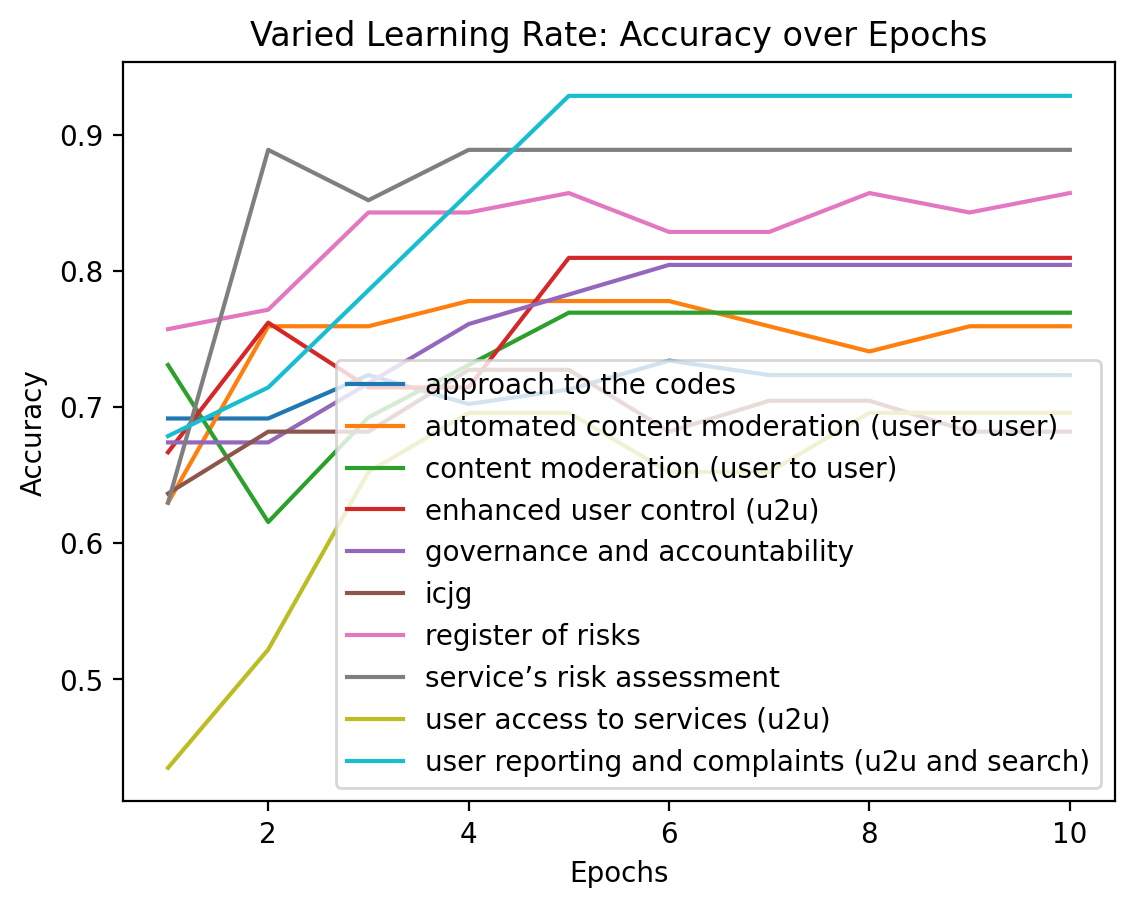

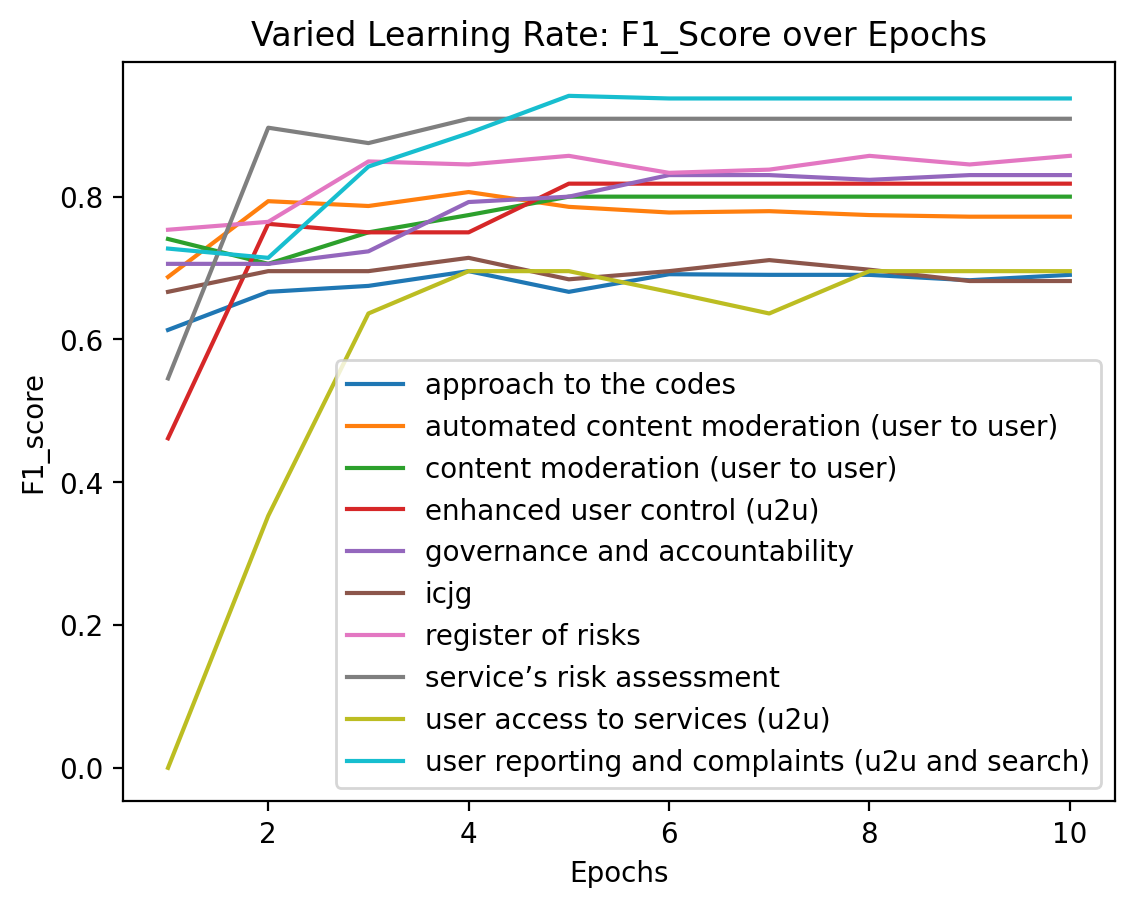

Bad pipe message: %s [b'\xdf\x86\xaa\xe2$\xcc+|E9\xd3W\xfe\x19\x80\n7U 6\x95\x8c8\x95G\xcd6;\x07\x81#2M\xe7F\x0ebj\x95@\x19\xb3A\xe9r}\xd2\x86\x01Ry\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 L\xffA\r\xb7\x13\xcc\xb1\xdf\x97\xa1J\xdaa']
Bad pipe message: %s [b'm\xa6\x98g\xd7\xc0Z\xb73\xacj\xd8\x84\xd5\x8e\xd9\xb2W 1TB\xb2<*\x9aH\x0fqI\x9b\x12{\xd9:P#\xa5\x03\xc5\xac\xe2*\xdf\xc1\xcdTX(\xda2\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00', b'\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x

In [148]:
from matplotlib import pyplot as plt


plt.figure(dpi=200)
for params, data in log_hist.items():
    plt.plot(data['epochs'], data['accuracy'], label=params)
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Varied Learning Rate: Accuracy over Epochs')
plt.savefig('/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Figures/Varied Learning Rate: Accuracy Models over 100 samples.png')
plt.show()

plt.figure(dpi=200)
for params, data in log_hist.items():
    plt.plot(data['epochs'], data['f1_score'], label=params)
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('F1_score')
plt.title('Varied Learning Rate: F1_Score over Epochs')
plt.savefig('/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Figures/Varied Learning Rate: F1_Score Models over 100 samples.png')
plt.show()

In [18]:
# Run this again with the new insights and compare!

In [13]:
d

PosixPath('/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/user reporting and complaints (u2u and search)')

In [132]:
import re
import os 

def contaits_digits(s):
    return any(char.isdigit() for char in s)

def get_last_checkpoint(model_dir):
    nums = []
    for file_name in model_dir.iterdir():
        if os.path.isdir(file_name):
            if contaits_digits(str(file_name.name)) is True:
                nums.append(int(re.sub(r"\D", "", str(file_name.name))))

    for file_name in model_dir.iterdir():
        if str(max(nums)) in file_name.name:
            return file_name

In [141]:
print(Path.joinpath("test", "/trainer_state.json").iterdir())

AttributeError: 'str' object has no attribute 'with_segments'

In [144]:
import os
from pathlib import Path
import json


directory = Path("/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/")
log_hist = {}
file_paths = [d for d in directory.iterdir() if os.path.isdir(d) and d.name != "runs"]
# print(file_paths)

for d in file_paths:
    file_path = Path.joinpath(d, "Mod_2/lr:1e-05_wd:0.01/")
    a = get_last_checkpoint(file_path)

    with open(str(a) + "/trainer_state.json") as fid:
        data = json.load(fid)
    # print(data.keys())
    epochs = []
    accuracy = []
    f1_score = []
    for i in data['log_history']:
        if i['epoch'] % 1 == 0:  # only store data on complete epochs
            epochs.append(i['epoch'])
            accuracy.append(i['eval_accuracy'])
            f1_score.append(i['eval_f1'])
        log_hist[d.name] = {"epochs" : epochs, "accuracy" : accuracy, "f1_score" : f1_score}
log_hist

{'approach to the codes': {'epochs': [1.0,
   2.0,
   3.0,
   4.0,
   5.0,
   6.0,
   7.0,
   8.0,
   9.0,
   10.0],
  'accuracy': [0.6914893617021277,
   0.6914893617021277,
   0.723404255319149,
   0.7021276595744681,
   0.7127659574468085,
   0.7340425531914894,
   0.723404255319149,
   0.723404255319149,
   0.723404255319149,
   0.723404255319149],
  'f1_score': [0.6133333333333333,
   0.6666666666666666,
   0.675,
   0.6956521739130435,
   0.6666666666666666,
   0.691358024691358,
   0.6904761904761905,
   0.6904761904761905,
   0.6829268292682927,
   0.6904761904761905]},
 'automated content moderation (user to user)': {'epochs': [1.0,
   2.0,
   3.0,
   4.0,
   5.0,
   6.0,
   7.0,
   8.0,
   9.0,
   10.0],
  'accuracy': [0.6296296296296297,
   0.7592592592592593,
   0.7592592592592593,
   0.7777777777777778,
   0.7777777777777778,
   0.7777777777777778,
   0.7592592592592593,
   0.7407407407407407,
   0.7592592592592593,
   0.7592592592592593],
  'f1_score': [0.6875,
   0.79365